In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Hazel\\Desktop\\Data Analyst (2024)\\Power BI & ML\\hr_data.csv')

In [4]:
#remove whitespace
df.columns=df.columns.str.strip()
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         15004 non-null  float64
 1   Last Evaluation            15004 non-null  float64
 2   Number of Projects         14999 non-null  float64
 3   Monthly Hours              15004 non-null  int64  
 4   Total Time at the Company  14999 non-null  float64
 5   Work Accidents             15000 non-null  float64
 6   Quit the Company           15004 non-null  int64  
 7   Promoted in Last 5 yrs     15004 non-null  int64  
 8   Departments                15004 non-null  object 
 9   salary                     15004 non-null  object 
 10  Management                 15004 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.3+ MB


<Axes: >

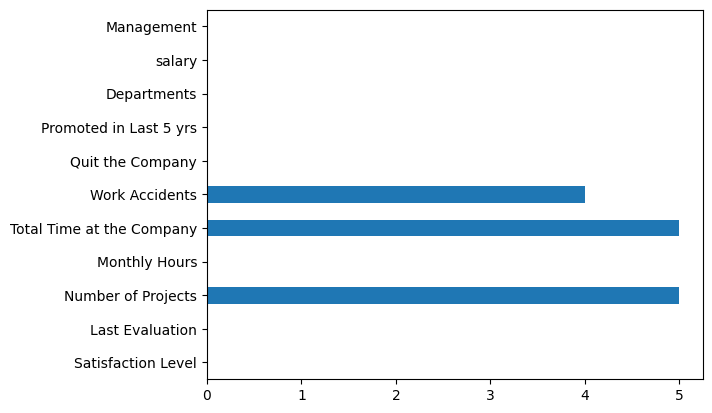

In [6]:
#Logistic regression will not run with null values
df.isnull().sum().plot(kind='barh')

In [7]:
#drop all NA 
df=df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  float64
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  float64
 5   Work Accidents             14999 non-null  float64
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [8]:
#people quit the company
df['Quit the Company'].value_counts()

Quit the Company
0    11428
1     3571
Name: count, dtype: int64

In [9]:
#good salary
pd.crosstab(df['salary'],df['Departments'],normalize='columns')

Departments,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,0.067645,0.064803,0.096480,0.060893,0.357143,0.093240,0.075388,0.064976,0.063257,0.073897
low,0.496333,0.462516,0.466754,0.453315,0.285714,0.468531,0.500000,0.507005,0.514132,0.504412
medium,0.436023,0.472681,0.436767,0.485792,0.357143,0.438228,0.424612,0.428019,0.422611,0.421691


<Axes: xlabel='Satisfaction Level', ylabel='salary'>

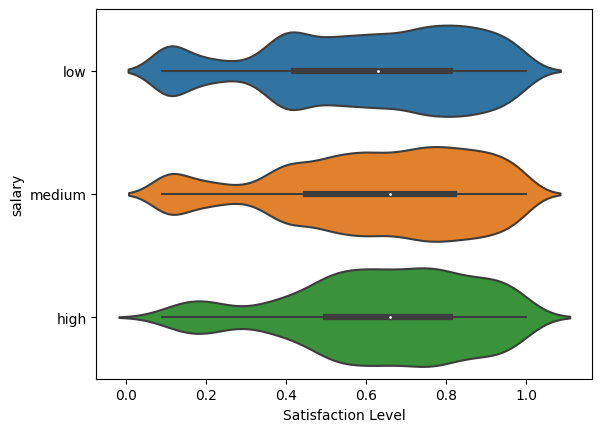

In [10]:
#kde plot
sns.violinplot(y=df['salary'],x=df['Satisfaction Level'])

In [11]:
df=pd.get_dummies(df,columns=['Departments'])
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,salary,Management,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2.0,157,3.0,0.0,1,0,low,31,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5.0,262,6.0,0.0,1,0,medium,71,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7.0,272,4.0,0.0,1,0,medium,8,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5.0,223,5.0,0.0,1,0,low,68,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2.0,159,3.0,0.0,1,0,low,48,False,False,False,False,False,False,False,True,False,False


In [12]:
#label it
label=LabelEncoder()
df['salary']=label.fit_transform(df['salary'])
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,salary,Management,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2.0,157,3.0,0.0,1,0,1,31,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5.0,262,6.0,0.0,1,0,2,71,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7.0,272,4.0,0.0,1,0,2,8,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5.0,223,5.0,0.0,1,0,1,68,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2.0,159,3.0,0.0,1,0,1,48,False,False,False,False,False,False,False,True,False,False


In [34]:
X=df.drop(['Quit the Company','Management'],axis=1)
y=df['Quit the Company']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)


In [36]:
#scale=StandardScaler()
#X_train_S=scale.fit_transform(X_train)
#X_test_S=scale.fit_transform(X_test)

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(X_test)
model.predict_proba(X_test)

array([[0.77819223, 0.22180777],
       [0.96301944, 0.03698056],
       [0.96240322, 0.03759678],
       ...,
       [0.54942388, 0.45057612],
       [0.86195717, 0.13804283],
       [0.86932414, 0.13067586]])

In [40]:
accuracy_score(y_test,y_pred)

0.7676190476190476

In [41]:
cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

array([0.77111111, 0.76666667, 0.76444444, 0.75777778, 0.76444444,
       0.76222222, 0.77777778, 0.76      , 0.77555556, 0.77951002])

In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7455,  540],
       [1900,  605]], dtype=int64)

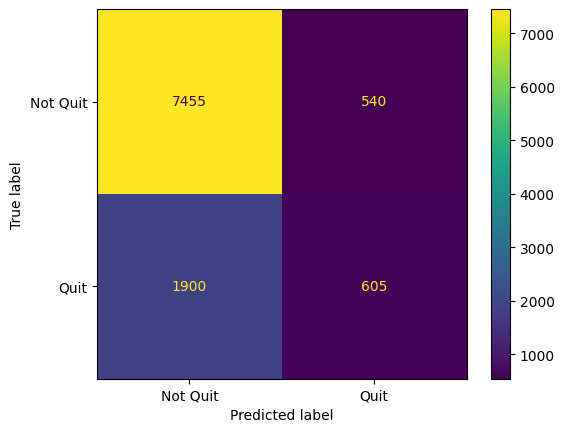

In [43]:
ConfusionMatrixDisplay(cm,display_labels=['Not Quit','Quit']).plot()

In [44]:
coef_df = pd.DataFrame(zip(X.columns, model.coef_.flatten()), columns=['feature', 'coef'])

# Sort the DataFrame by the 'coef' column in descending order
coef_df = coef_df.sort_values(by='coef', ascending=False)

# Display the sorted DataFrame
print(coef_df)

                      feature      coef
1             Last Evaluation  0.903084
11             Departments_hr  0.361347
13      Departments_marketing  0.350361
17      Departments_technical  0.309233
4   Total Time at the Company  0.224620
10     Departments_accounting  0.177261
15          Departments_sales  0.170135
14    Departments_product_mng  0.167836
16        Departments_support  0.108606
3               Monthly Hours  0.003774
7                      salary  0.001934
8              Departments_IT -0.107314
2          Number of Projects -0.288473
9           Departments_RandD -0.549879
6      Promoted in Last 5 yrs -0.779896
12     Departments_management -0.978979
5              Work Accidents -1.496479
0          Satisfaction Level -4.003914
